In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from scipy.signal import find_peaks, peak_widths
from scipy.stats import skew
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df_spectra = pd.read_excel('/content/drive/MyDrive/RSI_Google Colabs/final_augmented_data.xlsx')

df_spectra.head()

,Sample_ID,Presence of Bacteria,I_400.0,I_401.25,I_402.5,I_403.75,I_405.0,I_406.25,I_407.5,I_408.75,...,I_3487.5,I_3488.75,I_3490.0,I_3491.25,I_3492.5,I_3493.75,I_3495.0,I_3496.25,I_3497.5,I_3498.75
0,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,1,6.089664,11.612024,9.325159,5.292749,3.004716,2.603317,3.893447,7.233889,...,0.027579,5.020198,5.262564,3.555496,2.248717,3.269185,3.620880,7.378319,10.966154,12.324636
1,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,1,26.486849,5.211095,-11.135468,-8.519653,2.266452,-34.577669,17.028970,28.386415,...,-28.568820,-3.996428,7.325577,10.277747,20.264944,45.578627,-13.670270,-20.912103,-11.419274,0.572214
2,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,1,33.159648,31.678599,20.400375,12.944868,20.338444,53.519687,18.839002,17.216178,...,-4.328074,-8.296487,-19.353416,-3.202660,10.092635,-14.714453,-1.318488,13.805791,21.724366,12.545928
3,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,1,-17.744589,-1.450834,-1.267932,-4.846734,4.684601,57.805800,16.884563,-1.096564,...,-15.005890,-31.878429,9.631177,23.357064,15.579481,12.334848,21.656157,-4.632802,-0.192531,21.377337
4,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,1,16.223703,40.238232,30.911843,5.618915,-13.687258,9.312263,1.265050,-0.868702,...,38.499665,-32.171296,5.308562,7.132430,-14.795610,-17.605481,-6.094017,-18.508494,-3.882480,21.495319


In [ ]:
df_pp = df_spectra[df_spectra.columns[2:]].transpose()

df_pp.columns = df_spectra["Sample_ID"]

df_pp.head(5)

Sample_ID,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt_aug1,AMUL TAZA TONED_BACTERIA_D2.txt_aug2,AMUL TAZA TONED_BACTERIA_D2.txt_aug3,AMUL TAZA TONED_BACTERIA_D2.txt_aug4,...,Nandani toned milk Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole after heating.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24 h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk basic 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nestle toned milk Cold 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk RT 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk after heating 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk basic 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt
I_400.0,6.089664,26.486849,33.159648,-17.744589,16.223703,23.740307,5.710208,26.334336,18.859959,20.932495,...,778.351981,246.918028,397.035428,526.981033,725.503907,545.528299,126.980398,77.846897,78.101254,127.939547
I_401.25,11.612024,5.211095,31.678599,-1.450834,40.238232,26.191797,30.226529,24.862752,17.143352,34.943788,...,711.259052,173.238692,313.355519,426.945112,652.333531,471.822909,46.084663,-39.373431,-52.893258,-5.373783
I_402.5,9.325159,-11.135468,20.400375,-1.267932,30.911843,26.964317,35.570171,22.036737,22.807114,32.870860,...,653.109446,139.995531,288.251337,381.501931,594.645411,399.818359,-16.459885,-101.053270,-111.273072,-58.444343
I_403.75,5.292749,-8.519653,12.944868,-4.846734,5.618915,26.873504,28.839329,21.101179,26.383151,22.578674,...,611.794802,145.184160,313.179934,388.997612,561.099689,343.529258,-51.468058,-106.453052,-100.520243,-37.466132
I_405.0,3.004716,2.266452,20.338444,4.684601,-13.687258,26.066325,20.018778,19.807680,24.934185,13.195024,...,649.253161,151.663772,286.874260,408.144775,616.824667,420.059266,9.169404,-77.190418,-86.343649,-34.797525


In [ ]:
pp = Normalizer().fit_transform(df_pp)

df_pp = pd.DataFrame(pp, columns=df_spectra["Sample_ID"] , index= df_pp.index)

df_pp.head(5)

Sample_ID,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt_aug1,AMUL TAZA TONED_BACTERIA_D2.txt_aug2,AMUL TAZA TONED_BACTERIA_D2.txt_aug3,AMUL TAZA TONED_BACTERIA_D2.txt_aug4,...,Nandani toned milk Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole after heating.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24 h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk basic 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nestle toned milk Cold 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk RT 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk after heating 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk basic 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt
I_400.0,0.001417,0.006163,0.007715,-0.004129,0.003775,0.005524,0.001329,0.006127,0.004388,0.004870,...,0.181095,0.057449,0.092376,0.122610,0.168799,0.126925,0.029544,0.018112,0.018171,0.029767
I_401.25,0.002963,0.001330,0.008084,-0.000370,0.010269,0.006684,0.007714,0.006345,0.004375,0.008918,...,0.181512,0.044210,0.079968,0.108956,0.166475,0.120409,0.011761,-0.010048,-0.013498,-0.001371
I_402.5,0.002513,-0.003001,0.005497,-0.000342,0.008329,0.007266,0.009585,0.005938,0.006146,0.008857,...,0.175984,0.037723,0.077671,0.102798,0.160231,0.107734,-0.004435,-0.027229,-0.029983,-0.015748
I_403.75,0.001453,-0.002339,0.003554,-0.001331,0.001543,0.007378,0.007918,0.005793,0.007243,0.006199,...,0.167968,0.039860,0.085983,0.106799,0.154050,0.094316,-0.014131,-0.029227,-0.027598,-0.010286
I_405.0,0.000815,0.000614,0.005514,0.001270,-0.003711,0.007067,0.005427,0.005370,0.006760,0.003577,...,0.176019,0.041118,0.077774,0.110652,0.167227,0.113882,0.002486,-0.020927,-0.023409,-0.009434


In [ ]:
df_pp.index = df_pp.index.str.replace('I_', '', regex=False).astype(float)

df_pp.sample(5)

Sample_ID,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt_aug1,AMUL TAZA TONED_BACTERIA_D2.txt_aug2,AMUL TAZA TONED_BACTERIA_D2.txt_aug3,AMUL TAZA TONED_BACTERIA_D2.txt_aug4,...,Nandani toned milk Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole after heating.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24 h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk basic 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nestle toned milk Cold 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk RT 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk after heating 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk basic 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt
3173.75,0.000461,0.000746,0.003119,0.003502,0.001657,0.002155,0.001001,0.002701,0.001727,0.001075,...,0.156283,0.143349,0.104448,0.152584,0.250970,0.272108,0.164991,0.101477,0.086359,0.120830
3375.00,0.004302,-0.000448,-0.000598,0.031439,0.013031,0.003525,0.002764,0.008855,0.000109,0.006246,...,0.183964,0.156397,0.129404,0.120944,0.154415,0.173935,0.124499,0.076491,0.053881,0.055902
2446.25,0.016099,0.013636,-0.023201,0.036851,0.013514,0.014725,0.010265,0.011919,0.013800,0.007630,...,0.139019,0.144768,0.158734,0.115913,0.069217,0.147304,0.230171,0.222184,0.192154,0.112676
682.50,0.020733,0.016539,0.062491,-0.001841,0.035683,0.016665,-0.000368,0.022877,0.016133,0.008017,...,-0.096974,0.022140,-0.041358,-0.052990,-0.088920,-0.055853,0.052119,0.271530,0.365144,0.241014
1380.00,0.038895,0.043744,0.009676,-0.005075,0.035593,0.006956,0.013063,0.006776,0.020985,0.011023,...,-0.240686,-0.108431,-0.087186,-0.120789,-0.211671,-0.242302,-0.163471,-0.030863,-0.000264,-0.090457


In [ ]:
features = []

for col in df_pp.columns:
  intensity = df_pp[col].values
  shift = df_pp.index.values
  area = np.trapz(intensity,shift)

  peaks, props = find_peaks(intensity, prominence=0.01)
  num_peaks = len(peaks)

  if len(peaks) > 0:
            widths, width_heights, left_ips, right_ips = peak_widths(intensity, peaks, rel_height=0.5)
            sharpness = props['prominences'] / widths
            mean_sharpness = np.mean(sharpness)
  else:
            mean_sharpness = 0


  skew_value = skew(intensity)

  if len(peaks) > 0:
            max_prom_idx = np.argmax(props['prominences'])
            max_width = widths[max_prom_idx]
            max_prominence = props['prominences'][max_prom_idx]
            prom_to_width = max_prominence / max_width
  else:
            prom_to_width = 0

  max_peak_shift = shift[peaks[max_prom_idx]]

  features.append([area, num_peaks, mean_sharpness, skew_value, prom_to_width , max_peak_shift])

df = pd.DataFrame(features, columns=['area', 'num_peaks', 'mean_sharpness', 'skew_value', 'prom_to_width' , 'max_peak_wavelength'] , index = df_pp.columns)

df.head(5)

,area,num_peaks,mean_sharpness,skew_value,prom_to_width,max_peak_wavelength
Sample_ID,,,,,,
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,33.759553,87,0.011231,7.110121,0.106965,2056.25
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,30.131792,304,0.020344,2.416869,0.082673,2056.25
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,36.873090,314,0.019752,3.129959,0.093081,2056.25
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,33.606944,304,0.020020,3.260348,0.111702,2055.00
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,33.112554,305,0.020433,3.444693,0.125168,2056.25


In [ ]:
df["Presence of Bacteria"] = df_spectra["Presence of Bacteria"].values

df.head(5)

,area,num_peaks,mean_sharpness,skew_value,prom_to_width,max_peak_wavelength,Presence of Bacteria
Sample_ID,,,,,,,
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,33.759553,87,0.011231,7.110121,0.106965,2056.25,1
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug1,30.131792,304,0.020344,2.416869,0.082673,2056.25,1
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug2,36.873090,314,0.019752,3.129959,0.093081,2056.25,1
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug3,33.606944,304,0.020020,3.260348,0.111702,2055.00,1
AKSHAYA K-ALPHA FC_BACTERIA_D2.txt_aug4,33.112554,305,0.020433,3.444693,0.125168,2056.25,1


In [ ]:
df.to_excel('/content/drive/MyDrive/RSI_Google Colabs/final_feature_extracted_data.xlsx')

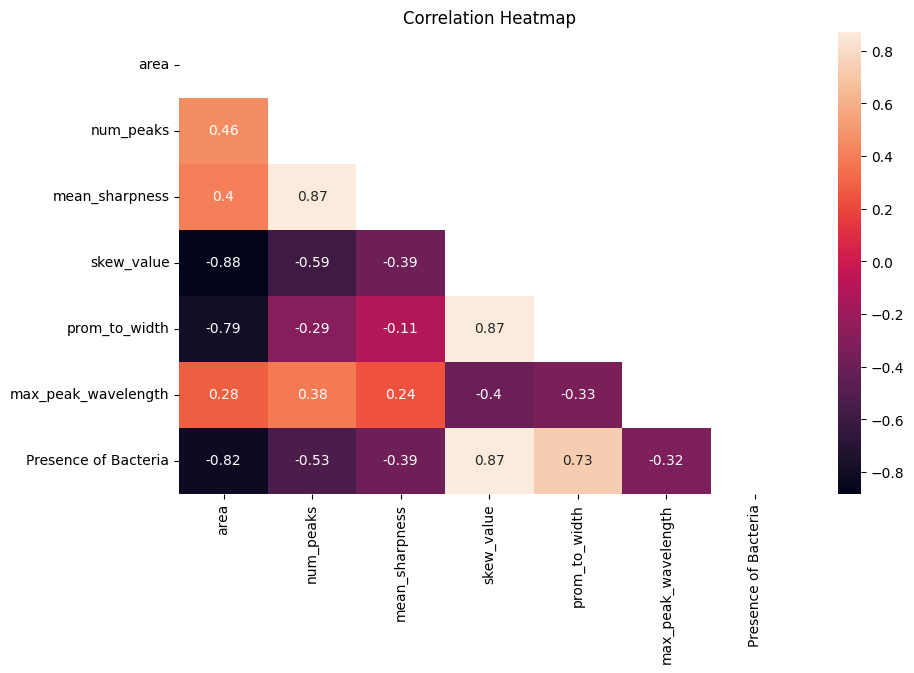

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, mask = np.triu(df.corr()))
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:
y = df["Presence of Bacteria"]
x = df.drop("Presence of Bacteria" , axis = 1)

x = StandardScaler().fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 42, test_size = 0.2)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      1.00      0.96        12

    accuracy                           0.95        19
   macro avg       0.96      0.93      0.94        19
weighted avg       0.95      0.95      0.95        19



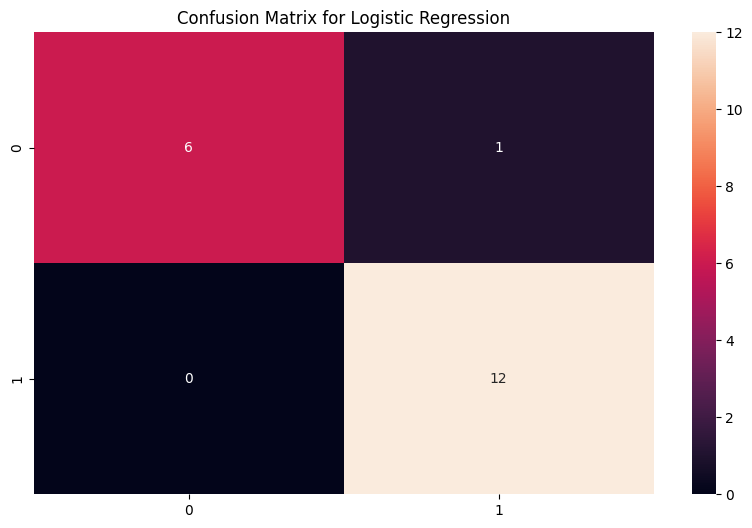

The AUC-ROC score is  0.9285714285714286


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)

log_reg_pred = log_reg.predict(xtest)

print(classification_report(ytest, log_reg_pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, log_reg_pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, log_reg_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      1.00      0.96        12

    accuracy                           0.95        19
   macro avg       0.96      0.93      0.94        19
weighted avg       0.95      0.95      0.95        19



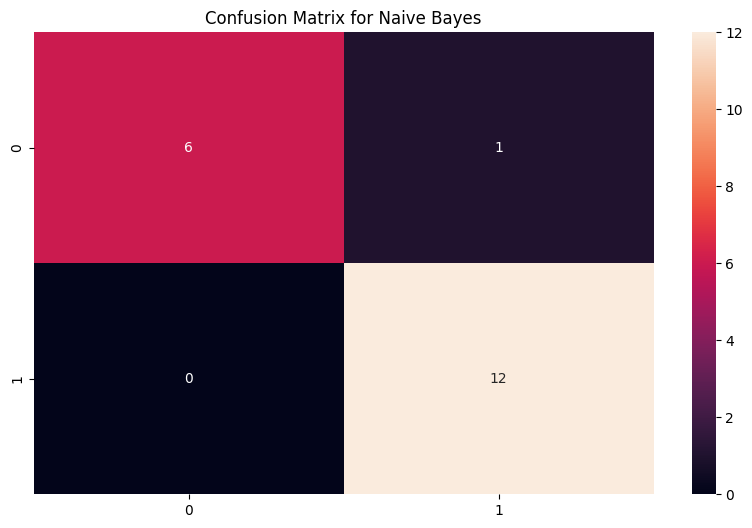

The AUC-ROC score is  0.9285714285714286


In [ ]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)

pred = nb.predict(xtest)

print(classification_report(ytest, pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      1.00      0.96        12

    accuracy                           0.95        19
   macro avg       0.96      0.93      0.94        19
weighted avg       0.95      0.95      0.95        19



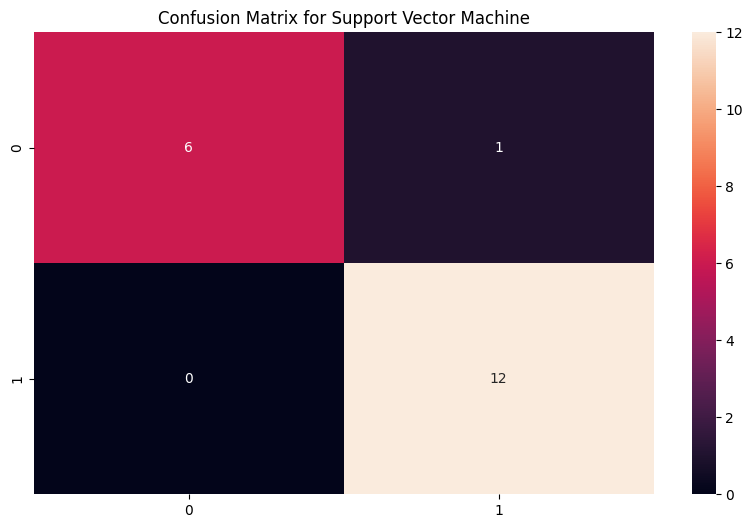

The AUC-ROC score is  0.9285714285714286


In [ ]:
svm = SVC()
svm.fit(xtrain, ytrain)

pred = svm.predict(xtest)

print(classification_report(ytest, pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



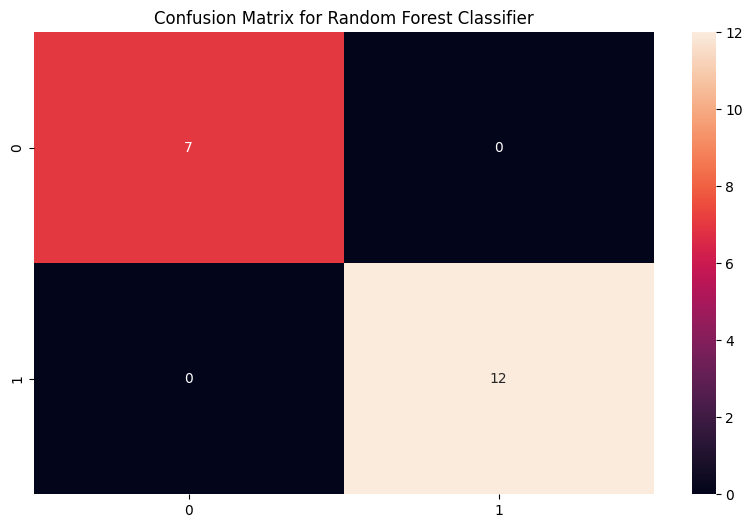

The AUC-ROC score is  1.0


In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

pred = rf.predict(xtest)

print(classification_report(ytest, pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.83      0.91        12

    accuracy                           0.89        19
   macro avg       0.89      0.92      0.89        19
weighted avg       0.92      0.89      0.90        19



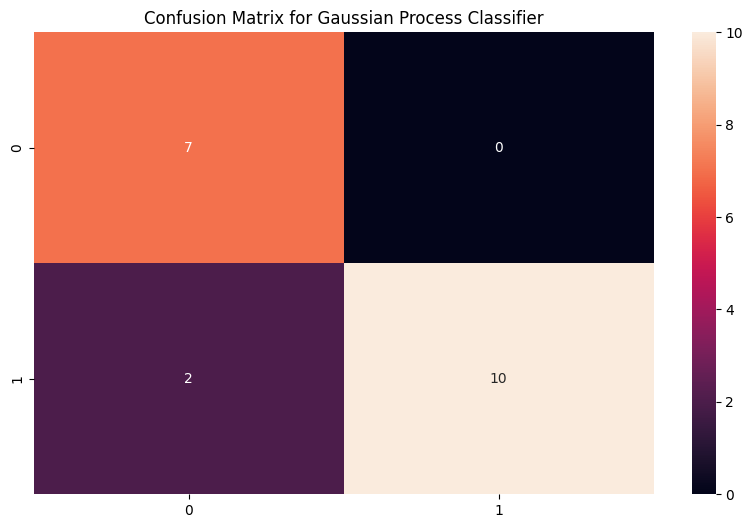

The AUC-ROC score is  0.9166666666666667


In [ ]:
gpc = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0))
gpc.fit(xtrain, ytrain)

pred = gpc.predict(xtest)

print(classification_report(ytest, pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for Gaussian Process Classifier")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



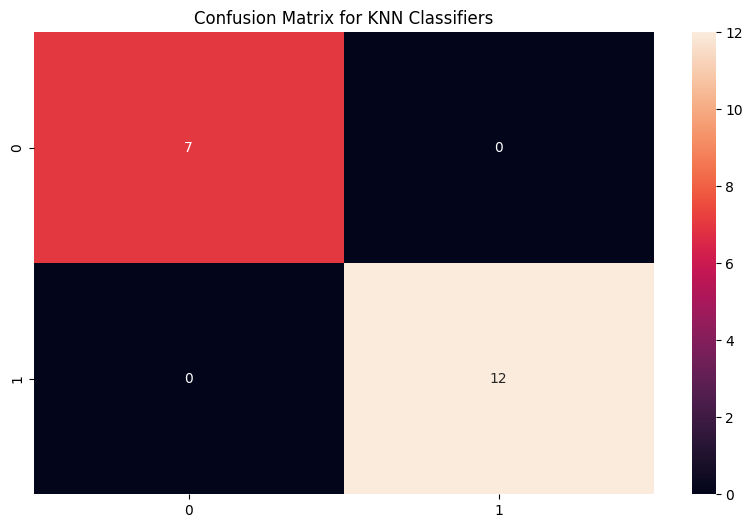

The AUC-ROC score is  1.0


In [ ]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

pred = knn.predict(xtest)

print(classification_report(ytest, pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt = 'd')
plt.title("Confusion Matrix for KNN Classifiers")
plt.show()
print("The AUC-ROC score is " , roc_auc_score(ytest, pred))

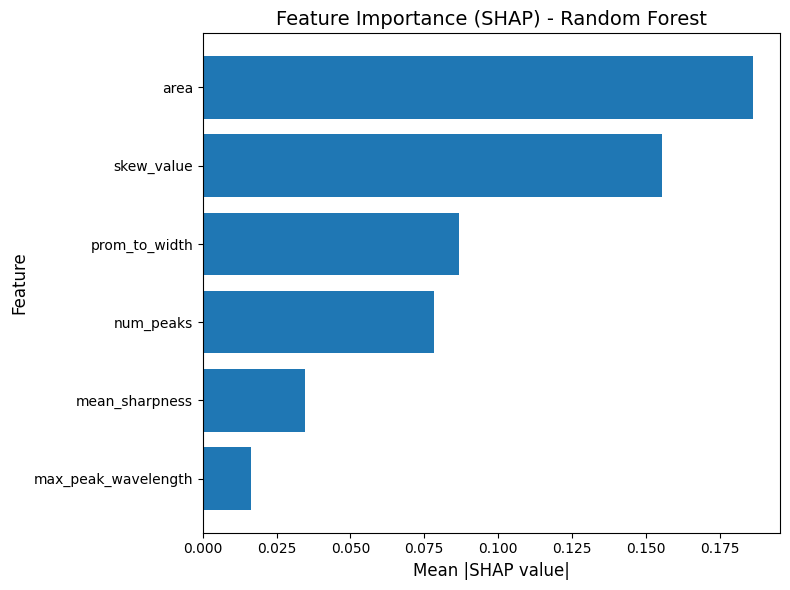

In [ ]:
import shap


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtest)[1]

mean_abs_shap = np.abs(shap_values).mean(axis=1)


sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_shap = mean_abs_shap[sorted_idx]
sorted_features = xtest_df.columns[sorted_idx]


plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_shap)
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance (SHAP) - Random Forest", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()